# Confusion Matrix 1

Die Erstellung der *Confusion Matrix* kann entweder mit *Scikit Learn* (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) oder mit *pandas_ml* (https://pandas-ml.readthedocs.io/en/latest/conf_mat.html) erfolgen. Scikit Learn sollte installiert sein. pandas_ml kann mit folgendem Befehl installiert werden: `conda install -c conda-forge pandas_ml`. Den jeweiligen Import nicht vergessen! Im Rahmen dieser Übung kommt die Scikit Learn-Variante zum Einsatz.

## Umsetzung mit Scikit Learn

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [11]:
# actual values
actual = [1,0,0,1,0,0,1,0,0,1]

# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]

**Default-Output von `confusion_matrix`:**
        
               Predicted
                 0    1
           0     5    1
    Actual    
           1     2    2
           
> Details liefert die API-Doku: **labels**:...If None is given, those that appear at least once in y_true or y_pred are used in sorted order.

**Output anpassen:**
Möchte man mit '1' (Positiv) beginnen, steht das Argument `labels` zur Verfügung:

In [12]:
print(confusion_matrix(actual, predicted, labels=[1,0]))

[[2 2]
 [1 5]]


In [13]:
tn, fp, fn, tp = confusion_matrix(actual, predicted).reshape(-1)

## Task 16.1
Grundlage bildet Übung 14, Heart Dataset in Kombintion mit dem Random Forest Classifier: Trainieren Sie den Random Forest Classifier und erstellen Sie die Confusion Matrix (CM) wie gezeigt.

In [14]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import re as regex

In [15]:
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
# Daten aufbereiten
mappings = {
    'Sex': {'M': 0, 'F': 1},
    'ChestPainType': {'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3},
    'RestingECG': {'Normal': 0, 'ST': 1, 'LVH': 2},
    'ExerciseAngina': {'N': 0, 'Y': 1},
    'ST_Slope': {'Up': 0, 'Flat': 1, 'Down': 2}
}

for col, mapping in mappings.items():
    heart[col] = heart[col].map(mapping)
    
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [17]:
X = heart.drop('HeartDisease', axis=1)
y = heart['HeartDisease']

In [18]:
clf = RandomForestClassifier(max_depth = 50, n_estimators=200, random_state=69)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=420)

In [20]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=200, random_state=69)

In [21]:
y_pred = clf.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.8943894389438944

In [23]:
print(confusion_matrix(y_test, y_pred))

[[118  21]
 [ 11 153]]


C:\Users\trueberryless\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


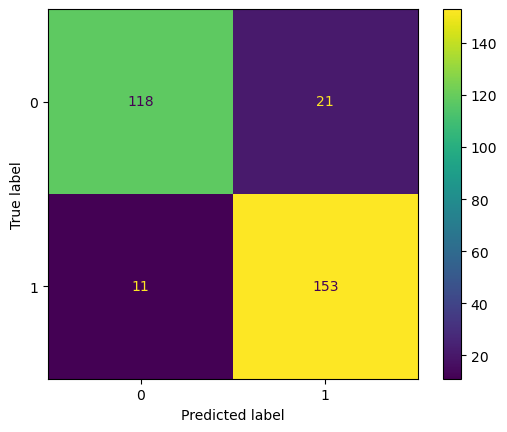

In [24]:
plot_confusion_matrix(clf, X_test, y_test)